In [67]:
import ctp
from datetime import datetime, timedelta

import pandas as pd
import seaborn as sns

In [68]:
state = "NH"
start_day = "20210101"
end_day = "20210131"
date_format = "%Y%m%d"

In [69]:
national = ctp.us()
states = ctp.states()

In [70]:
start = datetime.strptime(start_day, date_format)
end = datetime.strptime(end_day, date_format)

In [71]:
day = start
covid_data = []
while day <= end:
    covid_data.append(
        states.history(state=state.lower(), day=day.strftime(date_format))
    )
    day += timedelta(days=1)

In [72]:
covid_data = pd.DataFrame(covid_data)
covid_data.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210101,NH,44028,11332,479590,None,totalTestsViral,1032929,317,902,...,None,0,0,f21728b02064ee5ff9ce765289b0c90d2b697c5e,0,0,0,0,0,
1,20210102,NH,45184,11332,479590,None,totalTestsViral,1032929,335,910,...,None,10,8,ed5bd63a5df4ce418a5bedb74afe019eda409197,0,0,0,0,0,
2,20210103,NH,46450,12030,486465,None,totalTestsViral,1051054,325,913,...,None,11,3,1758cae076427b13b2100c414d8c594e9c121a48,0,0,0,0,0,
3,20210104,NH,47328,12392,488265,None,totalTestsViral,1055767,319,916,...,None,1,3,9138a20d966b4ffba5636e31f6d2673139a0d59f,0,0,0,0,0,
4,20210105,NH,47992,12630,490464,None,totalTestsViral,1061333,305,918,...,None,11,2,afea76f5b381f679db5b1e08a1862e6fd6606c80,0,0,0,0,0,


In [73]:
covid_data.date = pd.to_datetime(covid_data.date, format=date_format)

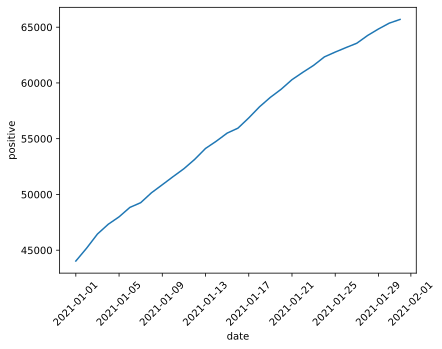

In [74]:
ax = sns.lineplot(covid_data, x="date", y="positive")
ax.tick_params(axis="x", rotation=45, labelright=True)